# Objective Aggregation Using Different Clustering Techniques
- Author: Renan Santos
- Email: renansantosmendes@gmail.com

### Importing main libs

In [1]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

Automatically created module for IPython interactive environment


### Reading the data

In [2]:
data = pd.read_csv('new_solutions.csv', encoding='utf-8', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,153736,282,172,8,1407,130,925,0.727273
1,156749,297,171,5,1471,159,948,0.618182
2,158737,275,170,8,1547,144,928,0.704545
3,157696,272,170,8,1526,144,935,0.704545
4,151332,188,155,7,1127,121,1057,0.753247


- As can seen in the above cell this solutions has 8 objectives and every one corresponding to different functions
- Total of solutions:

In [3]:
print(data.shape[0],'solutions')

10001 solutions


### Data Normalization
- In order to apply some clustering algorithms, let's normalize the data

In [4]:
X = pd.DataFrame(data=MinMaxScaler().fit_transform(data))
X.columns = 'f1 f2 f3 f4 f5 f6 f7 f8'.split()
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8
0,0.537206,0.293194,0.871345,0.363636,0.488849,0.446541,0.288115,0.661017
1,0.595396,0.308901,0.865497,0.090909,0.527426,0.628931,0.315726,0.355932
2,0.633790,0.285864,0.859649,0.363636,0.573237,0.534591,0.291717,0.597458
3,0.613685,0.282723,0.859649,0.363636,0.560579,0.534591,0.300120,0.597458
4,0.490778,0.194764,0.771930,0.272727,0.320072,0.389937,0.446579,0.733656


### Correlations
- Let's annalyse the correlations between the functions

#### With Pearson Correlation

In [5]:
X.corr(method='pearson')

,f1,f2,f3,f4,f5,f6,f7,f8
f1,1.000000,-0.114724,0.204251,0.527945,-0.149412,-0.142112,0.181428,0.471048
f2,-0.114724,1.000000,0.161714,-0.075300,0.841486,0.090616,-0.236705,-0.337899
f3,0.204251,0.161714,1.000000,0.351939,0.109612,-0.067752,0.065792,0.277531
f4,0.527945,-0.075300,0.351939,1.000000,-0.149354,-0.183970,0.313903,0.745574
f5,-0.149412,0.841486,0.109612,-0.149354,1.000000,0.087320,-0.590604,-0.501605
f6,-0.142112,0.090616,-0.067752,-0.183970,0.087320,1.000000,-0.071122,-0.182716
f7,0.181428,-0.236705,0.065792,0.313903,-0.590604,-0.071122,1.000000,0.489683
f8,0.471048,-0.337899,0.277531,0.745574,-0.501605,-0.182716,0.489683,1.000000


#### With Spearman Correlation

In [6]:
X.corr(method='spearman')

,f1,f2,f3,f4,f5,f6,f7,f8
f1,1.000000,-0.106441,0.182909,0.518107,-0.136225,-0.140557,0.175544,0.465382
f2,-0.106441,1.000000,0.228954,-0.081498,0.833722,0.093069,-0.226326,-0.330994
f3,0.182909,0.228954,1.000000,0.290841,0.179736,-0.044047,0.016656,0.194289
f4,0.518107,-0.081498,0.290841,1.000000,-0.148713,-0.175475,0.305007,0.745634
f5,-0.136225,0.833722,0.179736,-0.148713,1.000000,0.091025,-0.566095,-0.495086
f6,-0.140557,0.093069,-0.044047,-0.175475,0.091025,1.000000,-0.068069,-0.180239
f7,0.175544,-0.226326,0.016656,0.305007,-0.566095,-0.068069,1.000000,0.486528
f8,0.465382,-0.330994,0.194289,0.745634,-0.495086,-0.180239,0.486528,1.000000


#### With Kendall Correlation

In [7]:
X.corr(method='kendall')

,f1,f2,f3,f4,f5,f6,f7,f8
f1,1.000000,-0.071399,0.123340,0.387986,-0.091216,-0.094897,0.117574,0.323962
f2,-0.071399,1.000000,0.156478,-0.058902,0.640729,0.062701,-0.153181,-0.226812
f3,0.123340,0.156478,1.000000,0.214615,0.122594,-0.029992,0.011094,0.132715
f4,0.387986,-0.058902,0.214615,1.000000,-0.107403,-0.127952,0.223002,0.598477
f5,-0.091216,0.640729,0.122594,-0.107403,1.000000,0.061333,-0.400652,-0.345506
f6,-0.094897,0.062701,-0.029992,-0.127952,0.061333,1.000000,-0.045873,-0.123123
f7,0.117574,-0.153181,0.011094,0.223002,-0.400652,-0.045873,1.000000,0.340235
f8,0.323962,-0.226812,0.132715,0.598477,-0.345506,-0.123123,0.340235,1.000000


### Kurtosis

In [8]:
X.kurt()

f1   -0.020079
f2    0.423862
f3    3.095796
f4    0.022882
f5    0.158229
f6    0.052031
f7    0.009203
f8    1.645932
dtype: float64

### Skewness

In [9]:
X.skew()

f1   -0.134475
f2    0.644623
f3   -1.389040
f4    0.244521
f5    0.392052
f6    0.121391
f7   -0.255312
f8   -0.925450
dtype: float64

## Plotting the Data

### Pairplot

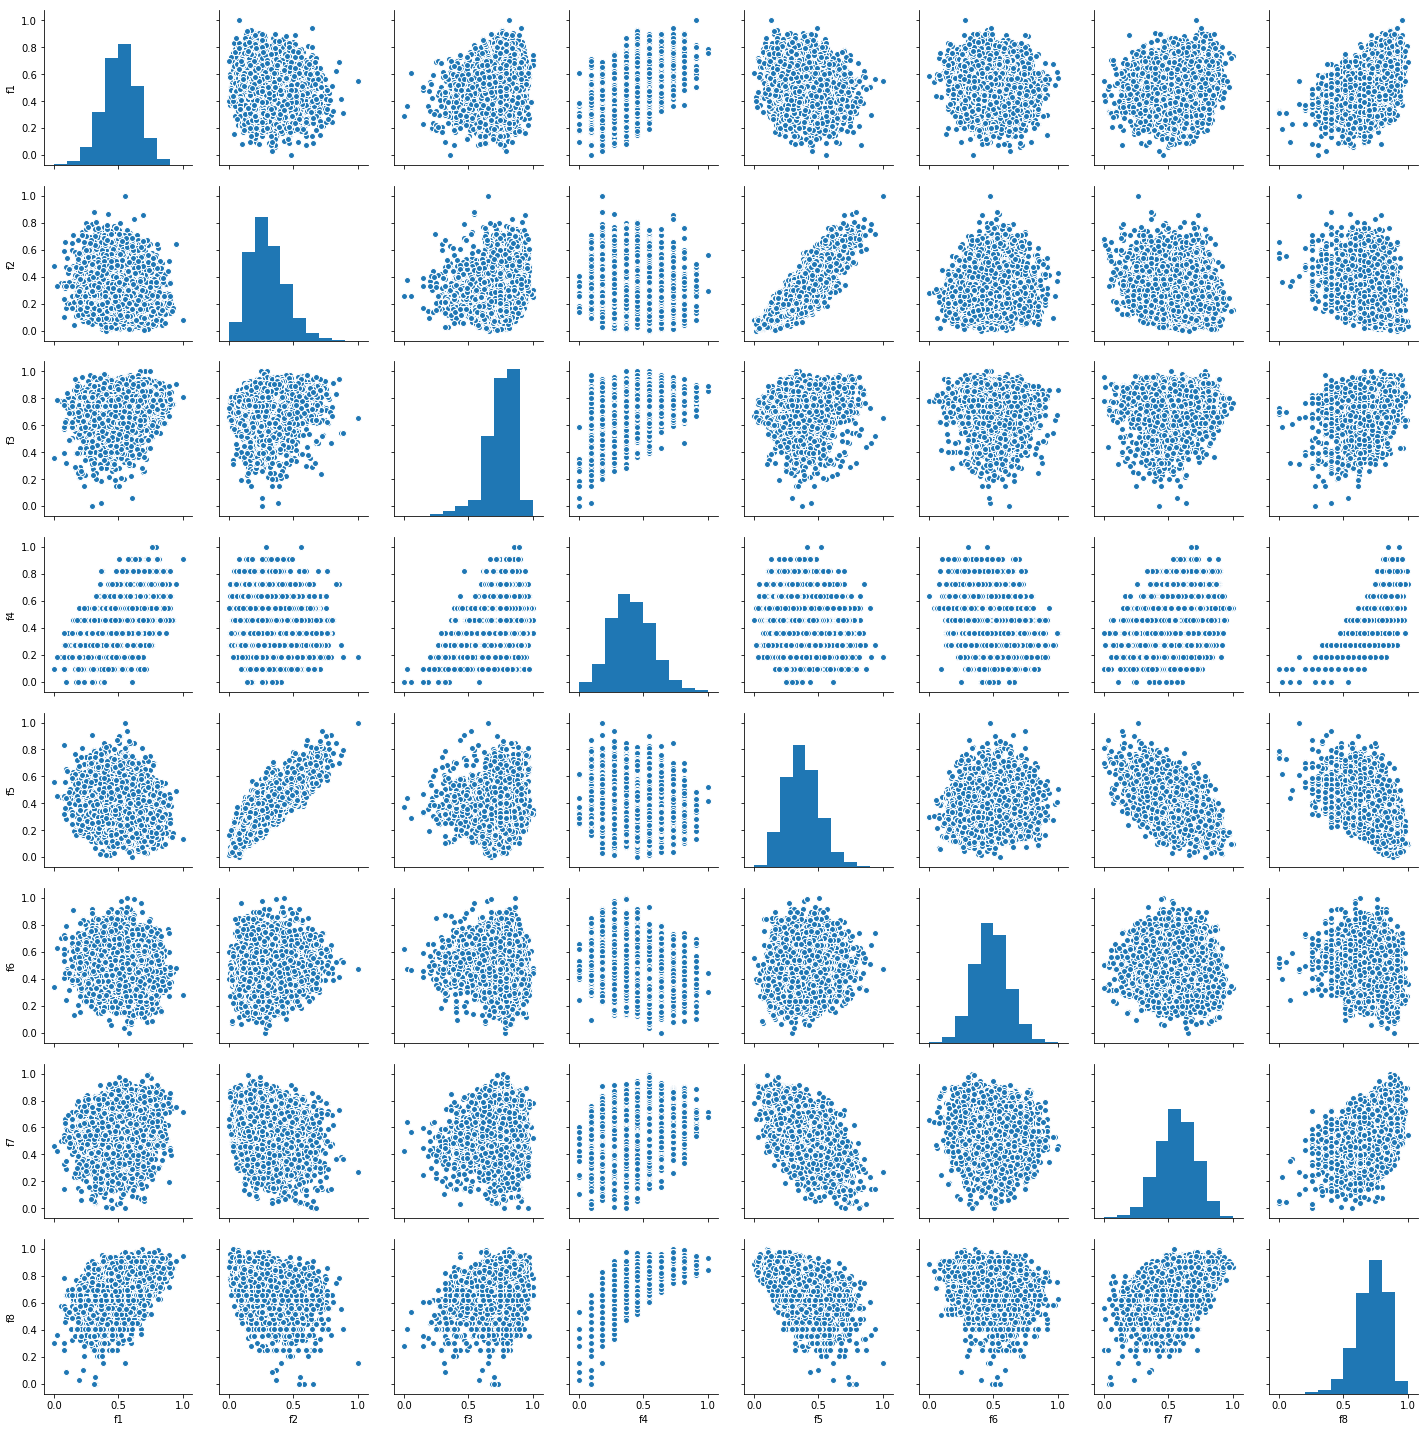

In [10]:
sns.pairplot(X)

### Boxplot of the data

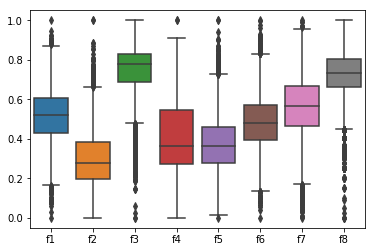

In [11]:
sns.boxplot(data = X, orient = "v")

# Clustering the Data

In [8]:
from sklearn.cluster import KMeans,DBSCAN,AffinityPropagation
from sklearn.cluster import AgglomerativeClustering,SpectralClustering
from sklearn.decomposition import PCA

## KMeans

In [9]:
n = 4
kmeans = KMeans(init='k-means++', n_clusters=n, n_init=10)
kmeans.fit(X.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.labels_

array([2, 0, 1, 2, 0, 3, 2, 1], dtype=int32)

## DBSCAN

In [11]:
db = DBSCAN(eps=15,min_samples=2).fit(X.T)
db.labels_

array([-1,  0,  1, -1,  0, -1, -1,  1])

In [12]:
db.core_sample_indices_

array([1, 2, 4, 7])

In [13]:
db.components_

array([[ 0.29319372,  0.30890052,  0.28586387, ...,  0.14764398,
         0.15287958,  0.15287958],
       [ 0.87134503,  0.86549708,  0.85964912, ...,  0.78947368,
         0.74853801,  0.74853801],
       [ 0.4888487 ,  0.52742616,  0.57323689, ...,  0.28872815,
         0.29535865,  0.29535865],
       [ 0.66101695,  0.3559322 ,  0.59745763, ...,  0.91525424,
         0.93644068,  0.93644068]])

- for 50 requests  -> array([-1,  0,  1, -1,  0, -1, -1,  1])
- for 200 requests -> array([ 0,  1, -1,  0,  1, -1, -1, -1])

- Removing the noise from data and doing the clustering

In [14]:
X_clear = X.drop(['f1','f4','f6','f7'], axis=1)
db_clear = DBSCAN(eps=15,min_samples=2).fit(X_clear.T)
db_clear.labels_

array([0, 1, 0, 1])

## Appling K-Means to find the centroids

In [20]:
n = 2
kmeans = KMeans(init='k-means++', n_clusters=n, n_init=10)
kmeans.fit(X_clear.T)
print(X_clear.columns)
print(kmeans.labels_)

Index(['f2', 'f3', 'f5', 'f8'], dtype='object')
[1 0 1 0]


- We could see that is the same aggregation
- Let's find the centroids

In [21]:
c0 = kmeans.cluster_centers_[0]
c1 = kmeans.cluster_centers_[1]

print('First centroid =',c0)
print('Second centroid =',c1)

First centroid = [ 0.76618099  0.61071464  0.72855337 ...,  0.85236396  0.84248934
  0.84248934]
Second centroid = [ 0.39102121  0.41816334  0.42955038 ...,  0.21818606  0.22411912
  0.22411912]


- Let's calculate the distance between each objetive to the respective centroid and find the closest

In [22]:
print('First centroid')
for objective in ['f2','f5']:
    print(objective, '->',np.linalg.norm(X_clear[objective].values - c0))

print('\nSecond centroid')
for objective in ['f3','f8']:
    print(objective, '->',np.linalg.norm(X_clear[objective].values - c1))

First centroid
f2 -> 47.0541256568
f5 -> 40.4685644796

Second centroid
f3 -> 44.4405741721
f8 -> 43.894202663


- They have the same distance
- Let's try to use Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2).fit(X_clear.T)
print(X_clear.columns)
print(ac.labels_)

Index(['f2', 'f3', 'f5', 'f8'], dtype='object')
[1 0 1 0]


- We could see that removing the data noise, the cluster result is the same from the previous test

## Now, let's try to cluster the noise with DBSCAN

In [24]:
X_noise = X[['f1','f4','f6','f7']]
db_noise = DBSCAN(eps=20,min_samples=2).fit(X_noise.T)
db_noise.labels_

array([ 0,  0, -1,  0])

In [25]:
db_noise.core_sample_indices_

array([0, 1, 3])

In [26]:
db_noise.components_

array([[ 0.5372062 ,  0.59539582,  0.63378976, ...,  0.77255258,
         0.83734719,  0.83734719],
       [ 0.36363636,  0.09090909,  0.36363636, ...,  0.63636364,
         0.72727273,  0.72727273],
       [ 0.28811525,  0.31572629,  0.29171669, ...,  0.57623049,
         0.53301321,  0.53301321]])

- cluster the noise with K-Means

In [28]:
n = 3
kmeans = KMeans(init='k-means++', n_clusters=n, n_init=10)
kmeans.fit(X_noise.T)
print(X_noise.columns)
print(kmeans.labels_)

Index(['f1', 'f4', 'f6', 'f7'], dtype='object')
[1 1 0 2]


- Could be seen that in both cluster algorithms the $f_6$ function is removed or isn't aggregated with the other functions

- Let's try to see the functions in $\mathbf{R}^2$ space. To do this, the PCA method will be applied in order to reduce the dimensionality

In [ ]:
pca = PCA(n_components=2)
pca.fit(X.T)

X_reduced = pca.transform(X.T)
X_df = pd.DataFrame(data=X_reduced, index ='f1 f2 f3 f4 f5 f6 f7 f8'.split(),
            columns = 'x y'.split())
plt.figure(figsize=(8,6))
for i in range(X_df.shape[0]):
    plt.scatter(X_df.iloc[i].x,X_df.iloc[i].y, label='f' + str(i+1))
    
plt.legend()  
plt.show()

### Testing the Usage of Entropy to Choose Objective Function

- Lower values gives better functions due to the high data purity 

In [18]:
import scipy

entropies = dict()
for column in X.columns:
    ep = scipy.stats.entropy(X[column])
    entropies[column] = ep
    print(column, ep)

f1 9.17598622654
f2 9.10674617842
f3 9.19710208928
f4 9.14321178923
f5 9.14555469442
f6 9.17103722275
f7 9.17361879718
f8 9.1946885133


### Defining the Number of Clusters

1 2938.24508615
2 1445.72808258
3 807.745218693
4 548.413528491
5 310.810080111
6 164.374262674
7 57.2520274307
8 0.0


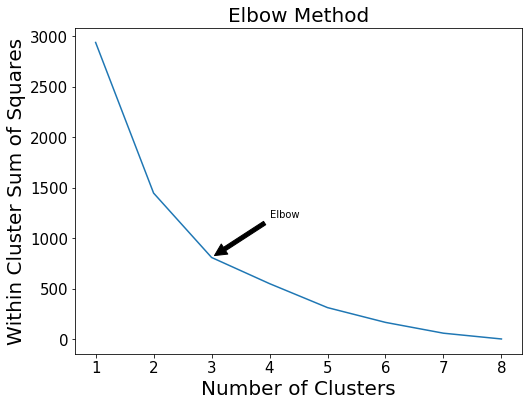

In [50]:
wcss = []
number_of_objectives = len(X.columns)
for i in range(1, number_of_objectives + 1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X.T)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  

    
y_value = wcss[2]
plt.figure(figsize=(8,6))
plt.plot(range(1, number_of_objectives + 1), wcss)
plt.annotate('Elbow', xy=(3, y_value), xytext=(4, 1200),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.title('Elbow Method',size=20)
plt.xlabel('Number of Clusters', size=20)
plt.xticks(size=15)
plt.ylabel('Within Cluster Sum of Squares',size=20)
plt.yticks(size=15)
plt.show()

### Using the Elbow Value
- Clustering the data with the elbow number using K-Means

In [51]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
kmeans.labels_

array([0, 2, 1, 0, 2, 0, 0, 1], dtype=int32)

- Considering the above clustering, the problem formulation can be defined as:

$F_1 = \lambda_1 f_1 + \lambda_4 f_4 + \lambda_6 f_6 + \lambda_7 f_7$

$F_2 = \lambda_3 f_3 + \lambda_8 f_8$

$F_3 = \lambda_2 f_2 + \lambda_5 f_5$